In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Files/dss_Alb h 2017-09.csv')
key = pd.read_excel('Files/Ethicon Alb Points List.xlsx')

In [3]:
# collects DataPointNames from the points list spreadsheet that are BAS point types
key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']

#converts pandas series to a list for future use
val = key_bas.values.T.tolist()
val.append('kW/Ton')

#removes DataPointNames that containt the prefix CHWV
vals = [x for x in val if not x.startswith('CHWV')]

#tests whether all values from the point list spreadsheet are column headings of the dataset
for x in vals:
    if x not in df.columns:
        #prints and removes any string not found in the data
        print(x)
        vals.remove(x)
        
#expresses data using columns specified by the vals list
bas = df[vals+['OptimumControl', 'kW/Ton']]
print('Original data contains '+str(df.shape[0])+' points and '+str(df.shape[1])+ ' dimensions.')
print('Filtered data contains '+str(bas.dropna().shape[0])+' points and '+str(bas.dropna().shape[1])+ ' dimensions.')

CommunicationFailure_COV
Original data contains 1465 points and 414 dimensions.
Filtered data contains 1432 points and 67 dimensions.


In [4]:
bas = df[vals].dropna()
bas.shape

(1432, 65)

In [5]:
n = len(bas.columns)

In [6]:
bas.columns

Index(['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2',
       'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CLGMODE',
       'CommunicationFailure', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST',
       'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ',
       'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH',
       'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S',
       'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW',
       'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ',
       'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed',
       'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS',
       'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD',
       'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP5kW', 'SCHWP5S',
       'SCHWP5SPD', 'SCHWP5SS', 'kW/Ton'],
      dtype='object')

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(bas.values[:, 0:(n-2)], bas.values[:,(n-1)], test_size = 0.25, random_state = 42)
#xtrain, xtest, ytrain, ytest = train_test_split(bas.values, bas.values, test_size = 0.25)

#### LASSO

In [17]:
reg_lasso = linear_model.Lasso()
reg_lasso.fit(xtrain, ytrain)
coef = reg_lasso.coef_
lasso_coef = pd.DataFrame(coef, bas.columns[:-2])
lasso_coef = lasso_coef[coef!=0]
lasso_coef.columns = ['lasso_coef']
lasso_coef

,lasso_coef
CHkW,1.073035e-03
CHWFLO,3.968178e-08


0.570783610920562
0.00011168432105425792


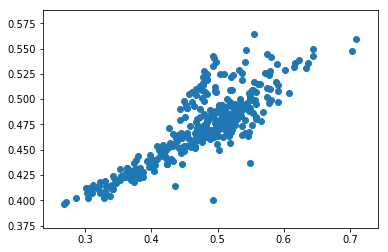

In [19]:
ylas = reg_lasso.predict(xtest)
plt.scatter(ytest, ylas)
print (metrics.r2_score(ytest, ylas))
print (metrics.mean_squared_error(ytest, ylin))

#### LINEAR REGRESSION

In [23]:
reg_linear = linear_model.LinearRegression()
reg_linear.fit(xtrain, ytrain)
coef = reg_linear.coef_
linear_coef = pd.DataFrame(coef, bas.columns[:-2])
linear_coef = linear_coef[abs(coef) > 1e-04]
linear_coef.columns = ['linear_coef']
linear_coef

,linear_coef
CDWVLV,-3.110015e+09
CHkW,5.320640e-04
CHWDP2,2.295835e-04
CHWRT,-1.470969e-03
CHWRT2,-2.119429e-03
CHWRT3,-2.352937e-03
CHWST,6.068360e-03
CHWST2,-1.852544e-03
CHWST3,-2.540704e-03
CTTR_ALARM,-1.169855e-01


In [12]:
linear_coef.describe()

,linear_coef
count,3.800000e+01
mean,-8.184264e+07
std,5.045110e+08
min,-3.110015e+09
25%,-1.230411e-02
50%,-1.985987e-03
75%,6.670973e-03
max,8.417287e+03


0.9810222974986476
0.00011168432105425792


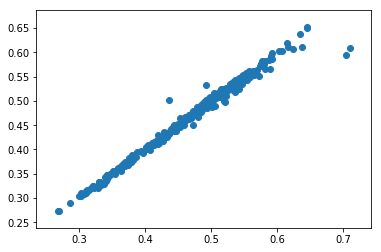

In [18]:
ylin = reg_linear.predict(xtest)
plt.scatter(ytest, ylin)
print (metrics.r2_score(ytest, ylin))
print (metrics.mean_squared_error(ytest, ylin))